In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [57]:
df_i = pd.read_csv('../datasets/intercom/insights.csv')
df_a = pd.read_csv('../datasets/intercom/apps.csv')

In [3]:
df_i.head()

,app_id,admin_id,created_at,created_at_date,event_name,intercom_user_id,interval,grouping
0,g8m4lecv,71474,2015-05-29 01:23:17 UTC,29/05/2015,inbox-insights-loaded,550c4aa02eb8ab4a3a000004,28.0,day
1,g8m4lecv,71474,2015-05-29 01:23:42 UTC,29/05/2015,inbox-insights-loaded,550c4aa02eb8ab4a3a000004,90.0,day
2,m6855w1q,38924,2015-05-29 01:54:50 UTC,29/05/2015,inbox-insights-loaded,543e07cbdef76b48f4015c39,7.0,day
3,m6855w1q,38924,2015-05-29 01:54:50 UTC,29/05/2015,inbox-insights-loaded,543e07cbdef76b48f4015c39,28.0,day
4,n9mj3wdx,63919,2015-05-29 02:05:05 UTC,29/05/2015,inbox-insights-loaded,5503cba518e9d773500001ba,28.0,day


In [4]:
df_i.groupby('event_name').size()

event_name
inbox-insights-loaded    41921
dtype: int64

In [5]:
df_i['intercom_user_id'].count()

41921

In [6]:
df_i.groupby('grouping').size()

grouping
day     37470
hour     2115
week     2336
dtype: int64

In [21]:
df_a.head()

,app_id,identifier,created_at
0,cxubl1y1,support,2015-09-05 00:00:00
1,cxubl1y1,support_pro,2015-09-05 00:00:00
2,ncvmsf6h,support_pro,2015-09-05 00:00:00
3,ncvmsf6h,support,2015-09-05 00:00:00
4,pf11l5sr,support,2015-09-05 00:00:00


In [7]:
df_a.groupby(['identifier']).size()

identifier
support        476558
support_pro    225415
dtype: int64

In [8]:
df_a['len'] = df_a['app_id'].apply(len)

In [9]:
df_a = df_a.sort_values(by=['len','created_at'], ascending=True)

In [10]:
df_a[df_a['app_id'] == 'rww2mzh'][0:15]

,app_id,identifier,created_at,len
639498,rww2mzh,support_pro,2015-05-08 00:00:00,7
639499,rww2mzh,support,2015-05-08 00:00:00,7
629588,rww2mzh,support,2015-05-09 00:00:00,7
629589,rww2mzh,support_pro,2015-05-09 00:00:00,7
626321,rww2mzh,support_pro,2015-05-10 00:00:00,7
626322,rww2mzh,support,2015-05-10 00:00:00,7
623055,rww2mzh,support,2015-05-11 00:00:00,7
623056,rww2mzh,support_pro,2015-05-11 00:00:00,7
619776,rww2mzh,support_pro,2015-05-12 00:00:00,7
619777,rww2mzh,support,2015-05-12 00:00:00,7


In [58]:
df_i[df_i['app_id'] == 'rww2mzh']

,app_id,admin_id,created_at,created_at_date,event_name,intercom_user_id,interval,grouping
16695,rww2mzh,36266,2015-07-20 22:25:23 UTC,20/07/2015,inbox-insights-loaded,541711534a60e664ac001b17,28.0,day
16696,rww2mzh,36266,2015-07-20 22:25:31 UTC,20/07/2015,inbox-insights-loaded,541711534a60e664ac001b17,7.0,day
16697,rww2mzh,36266,2015-07-20 22:25:32 UTC,20/07/2015,inbox-insights-loaded,541711534a60e664ac001b17,90.0,day


In [70]:
df_a[['app_id','identifier','created_at']].min()

app_id        01fc78b1e02fac05260df87f4936f57c4a23da87
identifier                                     support
created_at                         2015-02-25 00:00:00
dtype: object

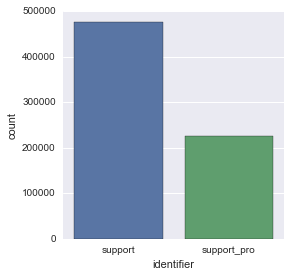

In [58]:
sns.factorplot('identifier',data=df_a,kind='count')

In [10]:
df_a.head()

,app_id,identifier,created_at
0,cxubl1y1,support,2015-09-05 00:00:00
1,cxubl1y1,support_pro,2015-09-05 00:00:00
2,ncvmsf6h,support_pro,2015-09-05 00:00:00
3,ncvmsf6h,support,2015-09-05 00:00:00
4,pf11l5sr,support,2015-09-05 00:00:00


In [59]:
 df_test = df_a[['app_id','identifier']].drop_duplicates()

In [60]:
df_test.count()

app_id        8872
identifier    8872
dtype: int64

In [17]:
d_mins = df_a.groupby(['app_id', 'identifier']).created_at.transform(min)
d_mins

0         2015-08-22 00:00:00
1         2015-08-22 00:00:00
2         2015-08-14 00:00:00
3         2015-08-13 00:00:00
4         2015-08-19 00:00:00
5         2015-08-26 00:00:00
6         2015-08-26 00:00:00
7         2015-09-01 00:00:00
8         2015-09-01 00:00:00
9         2015-09-05 00:00:00
10        2015-08-18 00:00:00
11        2015-09-02 00:00:00
12        2015-09-05 00:00:00
13        2015-08-18 00:00:00
14        2015-08-15 00:00:00
15        2015-08-25 00:00:00
16        2015-09-02 00:00:00
17        2015-09-01 00:00:00
18        2015-09-01 00:00:00
19        2015-09-02 00:00:00
20        2015-08-13 00:00:00
21        2015-08-13 00:00:00
22        2015-08-26 00:00:00
23        2015-08-26 00:00:00
24        2015-08-28 00:00:00
25        2015-09-03 00:00:00
26        2015-09-04 00:00:00
27        2015-09-04 00:00:00
28        2015-08-19 00:00:00
29        2015-08-20 00:00:00
                 ...         
701943    2015-02-26 00:00:00
701944    2015-02-26 00:00:00
701945    

In [18]:
df_a_min = df_a[df_a.created_at == d_mins]

In [14]:
df_a_min.count()

app_id        9348
identifier    9348
created_at    9348
dtype: int64

In [61]:
df_test.groupby(['identifier']).size()

identifier
support        6019
support_pro    2853
dtype: int64

In [64]:
df_pro = pd.DataFrame(df_test[df_test['identifier']=='support_pro']['app_id'])

In [65]:
df_pro.count()

app_id    2853
dtype: int64

In [66]:
df_pro = pd.merge(df_pro, df_i, on='app_id')

In [30]:
df_pro[df_pro['app_id'] == 'zuntlo9h']

,app_id,admin_id,created_at,created_at_date,event_name,intercom_user_id,interval,grouping
5851,zuntlo9h,150106,2015-09-01 01:12:55 UTC,01/09/2015,inbox-insights-loaded,55c3838892c2e15836000011,28.0,day
5852,zuntlo9h,150106,2015-09-01 01:13:09 UTC,01/09/2015,inbox-insights-loaded,55c3838892c2e15836000011,28.0,hour
5853,zuntlo9h,150106,2015-09-01 01:13:15 UTC,01/09/2015,inbox-insights-loaded,55c3838892c2e15836000011,28.0,week
5854,zuntlo9h,150106,2015-09-01 01:13:19 UTC,01/09/2015,inbox-insights-loaded,55c3838892c2e15836000011,28.0,hour


In [67]:
df_pro.groupby(('interval')).size()

interval
7.0      7241
28.0    27552
90.0     3802
dtype: int64

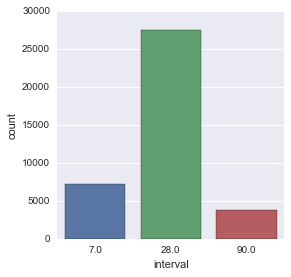

In [33]:
sns.factorplot('interval',data=df_pro,kind='count')

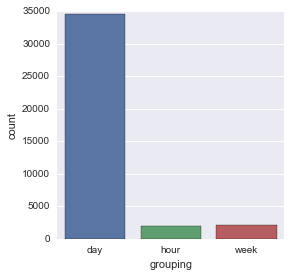

In [34]:
sns.factorplot('grouping',data=df_pro,kind='count')

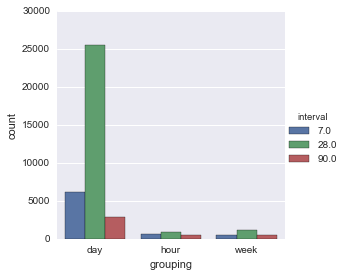

In [68]:
sns.factorplot('grouping',data=df_pro,kind='count', hue='interval')

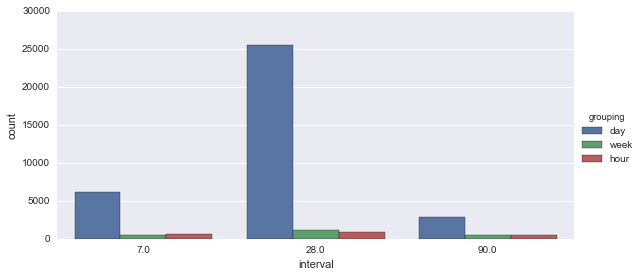

In [55]:
sns.factorplot('interval',data=df_pro,kind='count', hue='grouping', aspect=2)

In [69]:
import datetime

def change_date_format(date):
    return datetime.datetime.strptime(date, "%d/%m/%Y").strftime("%Y-%m-%d")

df_pro['date'] = df_pro['created_at_date'].apply(change_date_format)

In [70]:
df_pro = df_pro.sort_values(by='date', ascending=True)

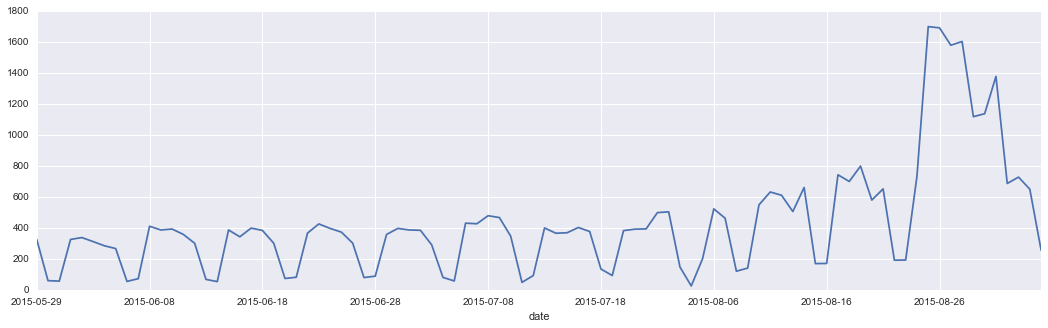

In [71]:
df_pro[['date','event_name']].groupby('date').size().plot(figsize=(18,5))

In [72]:
apps = []
new_apps = []
def new_app(df_pro):
    if df_pro['app_id'] not in apps:
        apps.append(df_pro['app_id'])
        new_apps.append({'date': df_pro['date'],'app_id':df_pro['app_id']})
        print df_pro['date'], df_pro['app_id']
        
df_pro.apply(new_app,axis=1)

2015-05-29 e8thg5og
2015-05-29 b0xoo8u3
2015-05-29 jbq7fow6
2015-05-29 esr5g9dh
2015-05-29 lo8mbmo9
2015-05-29 vbxba027
2015-05-29 faa870c3d5130b707e79ad6d32c778d107a0443e
2015-05-29 o9cu3u4e
2015-05-29 syuonu41
2015-05-29 mfhsavoz
2015-05-29 keqkt3fm
2015-05-29 ede963a7c7b854938c1196bb83dc3a0924951055
2015-05-29 j8nukb6m
2015-05-29 a7zsh6xf
2015-05-29 uyhsx6lo
2015-05-29 ze4rr0vi
2015-05-29 fc2ihik4
2015-05-29 wvqhq7d7
2015-05-29 zwbz8pxo
2015-05-29 ehj523md
2015-05-29 g7hyo725
2015-05-29 lp9lw6ze
2015-05-29 kz8udlea
2015-05-29 m0rnyex5
2015-05-29 m344ybg8
2015-05-29 c1ebb48d
2015-05-29 bmpafjwn
2015-05-29 co2eot0g
2015-05-29 h6f82l2e
2015-05-29 ch9pysmj
2015-05-29 fgs0qhtf
2015-05-29 ryx6jq53
2015-05-29 eay1qx7
2015-05-29 g9wqigbc
2015-05-29 jfwhinpl
2015-05-29 d7a67fa9e8fe650e2e83ce5e3f670fb184836825
2015-05-29 oy9xzdjc
2015-05-29 chqsqetu
2015-05-29 kw06m3f5
2015-05-29 tx2p130c
2015-05-29 xn43bho3
2015-05-29 co760a5w
2015-05-29 fucjx9ar
2015-05-29 id37d4az
2015-05-29 l508vkfn
2015-

11627    None
11232    None
28371    None
28372    None
28373    None
6402     None
6401     None
6400     None
6399     None
6398     None
6397     None
7437     None
11231    None
7438     None
7551     None
3609     None
37342    None
4574     None
36223    None
36222    None
36221    None
36220    None
36219    None
36218    None
36217    None
7550     None
36216    None
12321    None
12323    None
33821    None
         ... 
250      None
249      None
248      None
29239    None
29240    None
25975    None
5410     None
5411     None
5412     None
5413     None
29241    None
29242    None
29243    None
29245    None
1956     None
1957     None
7142     None
24246    None
24245    None
24244    None
255      None
24243    None
24241    None
6371     None
6419     None
6420     None
6421     None
29246    None
24242    None
29244    None
dtype: object

In [73]:
prev_date = new_apps[0]['date']

results = []
count = 0
for new_app in new_apps:
    if new_app['date'] == prev_date:
        count = count + 1
    else:
        results.append({'date':prev_date, 'new_apps': count})
        count = 0
        prev_date = new_app['date']


In [74]:
df_results = pd.DataFrame(results)

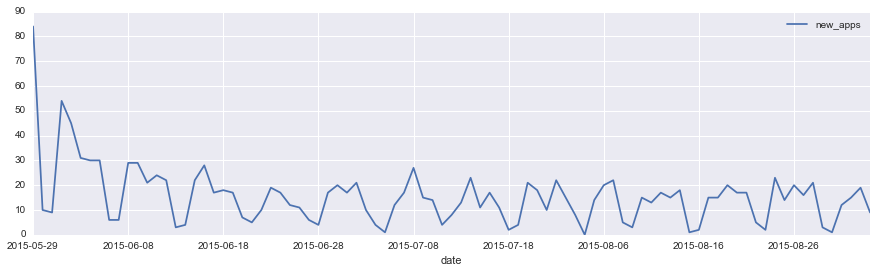

In [75]:
df_results.plot(x='date', y='new_apps', figsize=(15,4))

In [76]:
def get_week(date):
    y = int(date[0:4])
    m = int(date[5:7])
    d = int(date[8:10])
    return datetime.date(y,m,d).isocalendar()[1] - 22

df_results['week_number'] = df_results['date'].apply(get_week)

In [45]:
df_results

,date,new_apps,week_number
0,2015-05-29,84,0
1,2015-05-30,10,0
2,2015-05-31,9,0
3,2015-06-01,54,1
4,2015-06-02,45,1
5,2015-06-03,31,1
6,2015-06-04,30,1
7,2015-06-05,30,1
8,2015-06-06,6,1
9,2015-06-07,6,1


In [77]:
df_results.groupby(['week_number'],as_index=False).agg({'new_apps':'sum'})

,week_number,new_apps
0,0,103
1,1,202
2,2,132
3,3,114
4,4,79
5,5,90
6,6,97
7,7,81
8,8,94
9,10,64


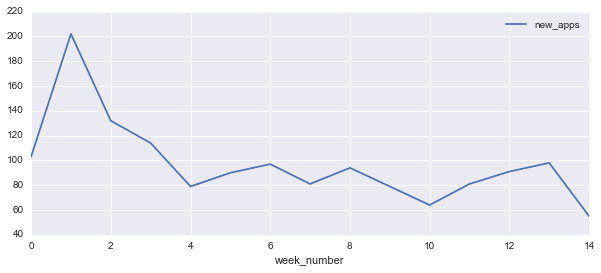

In [78]:
df_results.groupby(['week_number'],as_index=False).agg({'new_apps':'sum'}).plot(x='week_number',
                                                                                y='new_apps', figsize=(10,4))

In [90]:
df_pro[0:10]

,app_id,admin_id,created_at,created_at_date,event_name,intercom_user_id,interval,grouping,date
16969,ehj523md,89105,2015-05-29 18:39:08 UTC,29/05/2015,inbox-insights-loaded,5565290c72a3a312b40000fa,28.0,day,2015-05-29
21445,ze4rr0vi,39457,2015-05-29 06:17:20 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,28.0,day,2015-05-29
21446,ze4rr0vi,39457,2015-05-29 06:17:23 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,7.0,day,2015-05-29
21447,ze4rr0vi,40349,2015-05-29 16:38:59 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,28.0,day,2015-05-29
21448,ze4rr0vi,40349,2015-05-29 16:39:19 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,90.0,day,2015-05-29
21449,ze4rr0vi,39735,2015-05-29 19:13:25 UTC,29/05/2015,inbox-insights-loaded,54480629c484392efc0026ea,28.0,day,2015-05-29
21450,ze4rr0vi,39735,2015-05-29 19:13:27 UTC,29/05/2015,inbox-insights-loaded,54480629c484392efc0026ea,28.0,hour,2015-05-29
21451,ze4rr0vi,39735,2015-05-29 19:13:48 UTC,29/05/2015,inbox-insights-loaded,54480629c484392efc0026ea,7.0,hour,2015-05-29
39987,chqsqetu,51876,2015-05-29 07:18:25 UTC,29/05/2015,inbox-insights-loaded,54bf11ccf4d09c665d0049a5,28.0,day,2015-05-29
39988,chqsqetu,51876,2015-05-29 07:20:01 UTC,29/05/2015,inbox-insights-loaded,54bf11ccf4d09c665d0049a5,7.0,day,2015-05-29


In [79]:
def get_week(date):
    y = int(date[0:4])
    m = int(date[5:7])
    d = int(date[8:10])
    return datetime.date(y,m,d).isocalendar()[1]

df_pro['week_number'] = df_pro['date'].apply(get_week)

In [80]:
df_pro.groupby(['week_number'],as_index=False).agg({'created_at_date':'count'})

,week_number,created_at_date
0,22,441
1,23,1649
2,24,1965
3,25,1964
4,26,2027
5,27,1950
6,28,2286
7,29,2136
8,30,2339
9,32,1444


In [81]:
df_pro.groupby(['week_number'],as_index=False).agg({'intercom_user_id': pd.Series.nunique})

,week_number,intercom_user_id
0,22,146
1,23,427
2,24,461
3,25,508
4,26,467
5,27,501
6,28,577
7,29,592
8,30,597
9,32,401


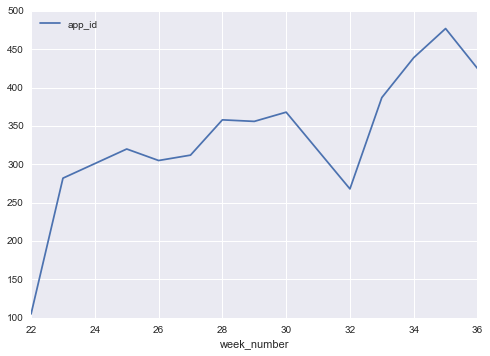

In [83]:
df_pro.groupby(['week_number'],as_index=False).agg({'app_id': pd.Series.nunique}).plot(x='week_number',
                                                                                                 y='app_id')

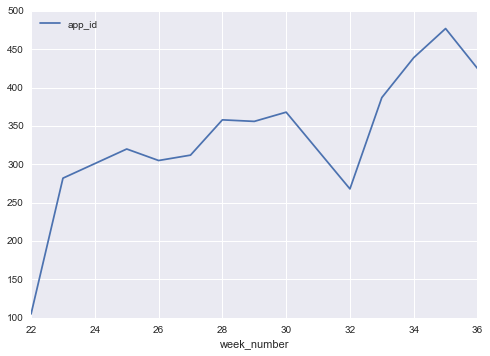

In [90]:
df_pro.groupby(['week_number'],as_index=False).agg({'app_id': pd.Series.nunique}).plot(x='week_number',
                                                                                                 y='app_id', by='grouping')


In [110]:
df_pro.groupby(['week_number'],as_index=False).agg({'app_id': pd.Series.nunique})

,week_number,app_id
0,22,105
1,23,282
2,24,301
3,25,320
4,26,305
5,27,312
6,28,358
7,29,356
8,30,368
9,32,268


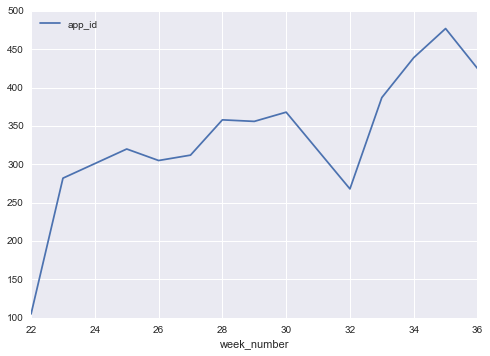

In [113]:
df_pro.groupby(['week_number'],as_index=False).agg({'app_id': pd.Series.nunique}).plot(x='week_number',
                                                                                                 y='app_id')

In [11]:
df_a.head()

,app_id,identifier,created_at,len
675824,1ib2dk,support,2015-04-17 00:00:00,6
674689,1ib2dk,support,2015-04-18 00:00:00,6
673531,1ib2dk,support,2015-04-19 00:00:00,6
672360,1ib2dk,support,2015-04-20 00:00:00,6
671159,1ib2dk,support,2015-04-21 00:00:00,6


In [44]:
df_aa = df_a.groupby(('created_at','identifier'),as_index=False).count()

In [48]:
df_aa[0:10]

,created_at,identifier,app_id,len
0,2015-02-25 00:00:00,support,2,2
1,2015-02-26 00:00:00,support,3,3
2,2015-02-26 00:00:00,support_pro,1,1
3,2015-02-27 00:00:00,support,4,4
4,2015-02-27 00:00:00,support_pro,1,1
5,2015-02-28 00:00:00,support,6,6
6,2015-02-28 00:00:00,support_pro,1,1
7,2015-03-01 00:00:00,support,6,6
8,2015-03-01 00:00:00,support_pro,1,1
9,2015-03-02 00:00:00,support,6,6


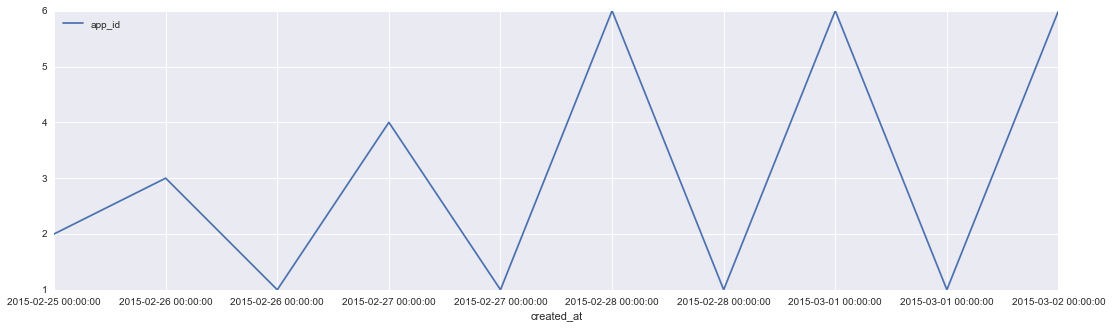

In [47]:
df_aa[0:10].plot(x='created_at',y='app_id', figsize=(18,5),by='identifier')

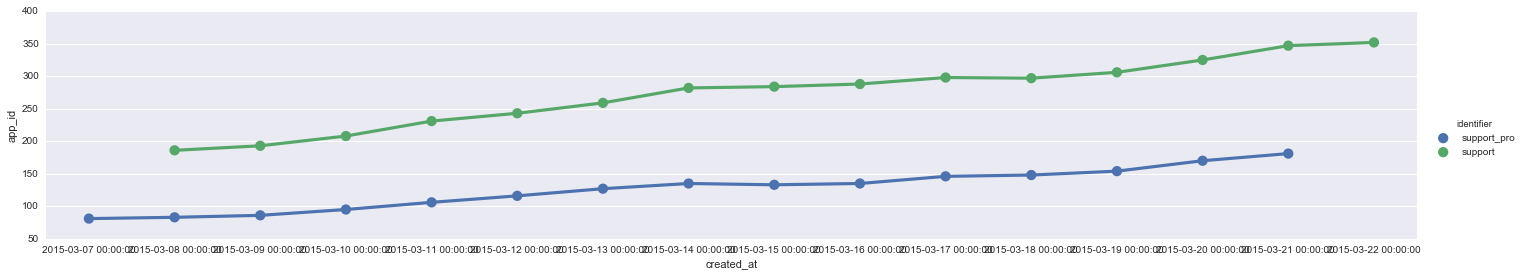

In [53]:
sns.factorplot(x='created_at',y='app_id',data=df_aa[20:50], aspect=5, hue='identifier')

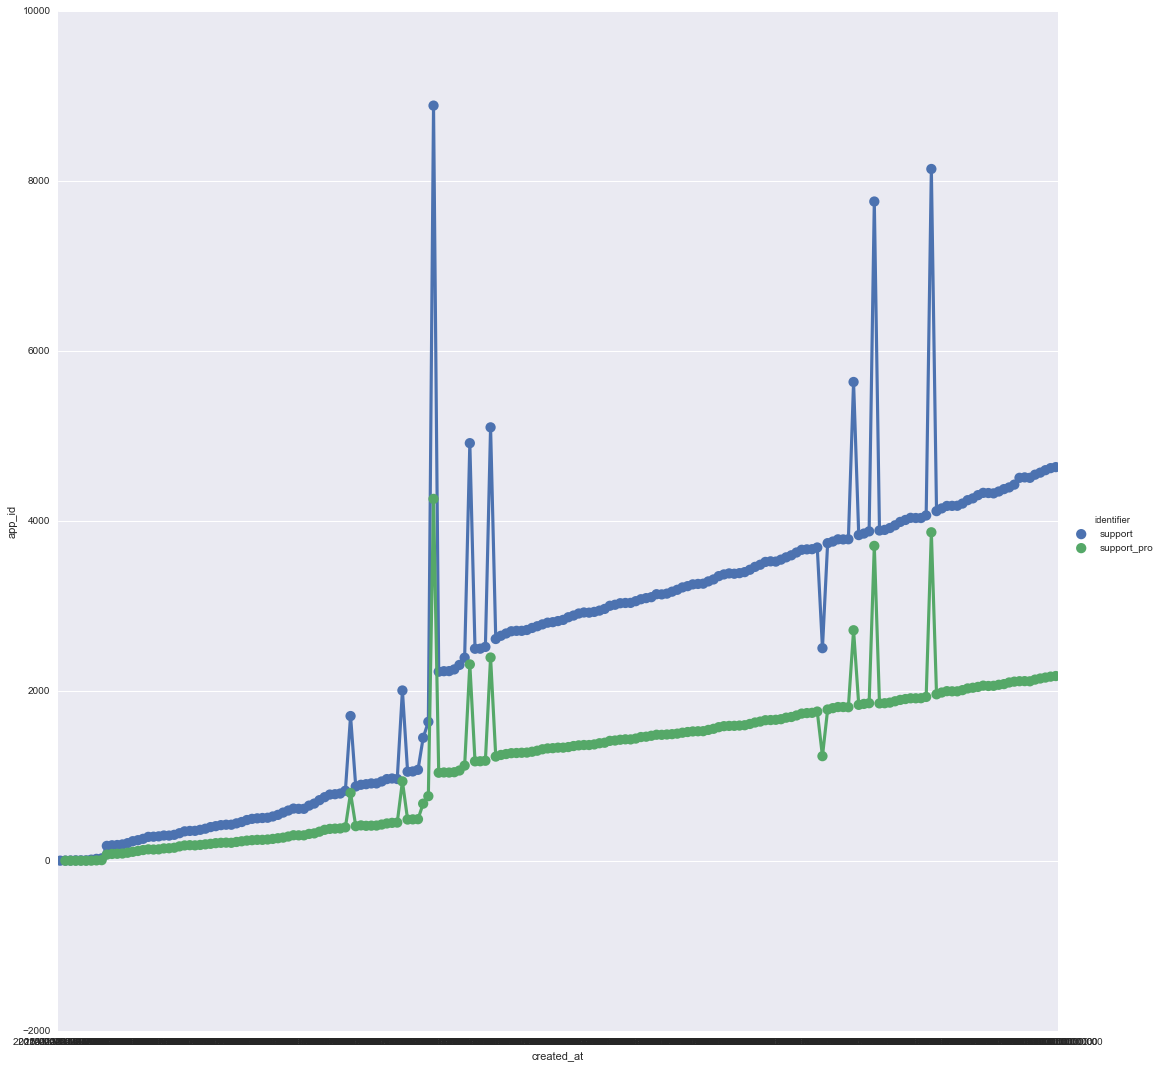

In [62]:
sns.factorplot(x='created_at',y='app_id',data=df_aa, size=15, hue='identifier')

In [65]:
import datetime

def change_date_format(date):
    return datetime.datetime.strptime(date, "%Y-%m-%d 00:00:00").strftime("%Y-%m-%d")

df_aa['date'] = df_aa['created_at'].apply(change_date_format)

In [66]:
df_aa.head()

,created_at,identifier,app_id,len,date
0,2015-02-25 00:00:00,support,2,2,2015-02-25
1,2015-02-26 00:00:00,support,3,3,2015-02-26
2,2015-02-26 00:00:00,support_pro,1,1,2015-02-26
3,2015-02-27 00:00:00,support,4,4,2015-02-27
4,2015-02-27 00:00:00,support_pro,1,1,2015-02-27


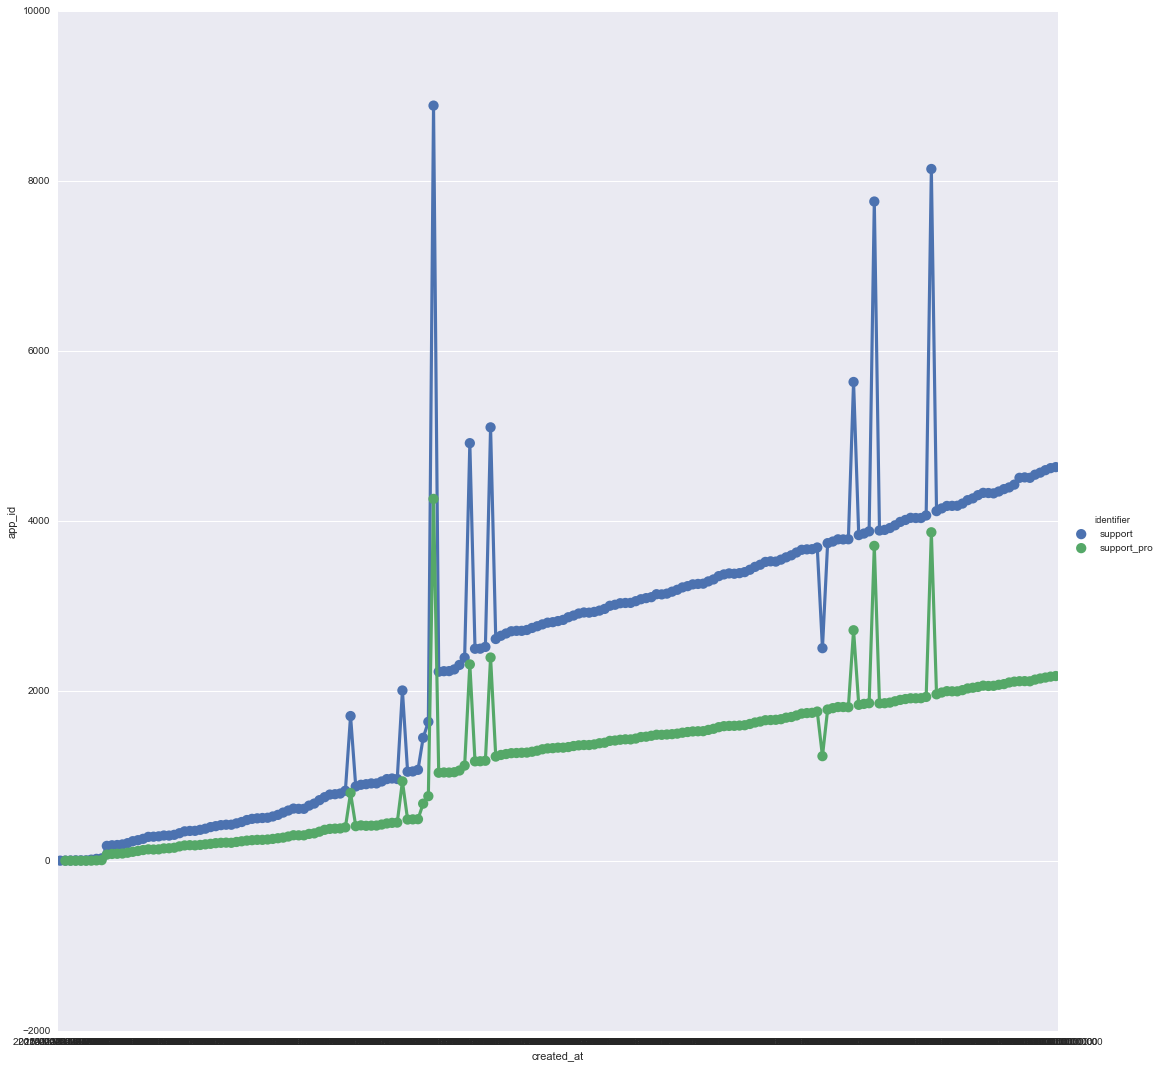

In [67]:
sns.factorplot(x='created_at',y='app_id',data=df_aa, size=15, hue='identifier')

In [81]:
def get_month(date):
    return date[5:7]

df_a['month'] = df_a['created_at'].apply(get_month)

In [85]:
df_aa_m = df_aa.groupby(('month','identifier'),as_index=False).size()

In [86]:
df_aa_m.head()

month  identifier 
02     support         4
       support_pro     3
03     support        31
       support_pro    31
04     support        30
dtype: int64

In [87]:
sns.factorplot(x='month',y='app_id',data=df_aa_m, size=15, hue='identifier')

ValueError: Could not interpret input 'month'